<a href="https://colab.research.google.com/github/CLEONG123/Coder/blob/main/proyectodsparte1_gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titulo: Análisis de venta de máquinas expendedoras

Autores:César Gonzalez


Definición del problema

R: Estudio de las preferencias del consumidor sobre compras en máquinas expendedoras

Objetivo

R: Entender la tendencia estacional del consumo de productos según el medio de pago aplicado

Hipótesis:

R:Hipótesis: "Las ventas realizadas en efectivo durante el año son predominantemente para la compra de comida en comparación con otras categorías de productos en la máquina expendedora."

Hipótesis nula (H₀): "No existe diferencia significativa en las ventas en efectivo entre comida y otras categorías de productos."

Hipótesis alternativa (H₁): "Las ventas en efectivo son significativamente mayores para comida en comparación con otras categorías de productos."

Y en el caso que rechazemos la hipótesis nula, podremos obtener una ecuación que nos permita pronósticar con un alto grado de confianza, de como estimar las ventas al contado en las máquinas expendedoras durante el año?


In [6]:
! git clone https://github.com/CLEONG123/Project.git

Cloning into 'Project'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 261.92 KiB | 1.26 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sns.set()
data = pd.read_csv("/content/Project/vending_machine_sales.csv")

# Dentro de las características más relevantes del dataset, es que tiene la columna "Type" la cual nos permite entender el método de pago y la columna "Categoría" la cual nos permite entender si es que se compró comida con el efectivo utilizado.

In [8]:
data.head()



,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


# A partir de las características del dataframe, es clave entender que en el campo categoría, los campos vacíos solo representan el 2,7% del total del campo "Categoría" y se puede eliminar ya que al estar vacío queda fuera de nuestro campo de búsqueda, que es "Food"

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

# Una vez ya limpiado los campos que manejaban datos sin valor, inmediatamente nos damos cuenta que, a través del promedio del valor de los productos vendidos en máquinas expendedoras, es de un poco menos de 2 dólares, teniendo como outlier productos que valen 5 dólares.

In [10]:
data = data.dropna(subset="Product")
data =data.dropna(subset="Category")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9350 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9350 non-null   object 
 1   Device ID    9350 non-null   object 
 2   Location     9350 non-null   object 
 3   Machine      9350 non-null   object 
 4   Product      9350 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9350 non-null   int64  
 7   TransDate    9350 non-null   object 
 8   Type         9350 non-null   object 
 9   RCoil        9350 non-null   int64  
 10  RPrice       9350 non-null   float64
 11  RQty         9350 non-null   int64  
 12  MCoil        9350 non-null   int64  
 13  MPrice       9350 non-null   float64
 14  MQty         9350 non-null   int64  
 15  LineTotal    9350 non-null   float64
 16  TransTotal   9350 non-null   float64
 17  Prcd Date    9350 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage: 1.4+

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
count,9.350000e+03,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000
mean,1.537972e+10,132.772086,1.935027,1.014011,132.772086,1.935027,1.014011,1.960508,2.193743
std,4.431875e+08,13.247850,0.667201,0.124609,13.247850,0.667201,0.124609,0.709267,1.062778
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000
25%,1.503203e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000
50%,1.538368e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,1.500000
75%,1.573935e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.750000
max,1.617733e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,9.000000


# Ya entrando en más búsqueda de la hipótesis, gráficamos bajo un histograma la frecuencia de compra en las máquinas, es decir la relación hasta el momento sería 2:1 de compras en efectivo vs tarjeta, y una relación parecida entre las compras de comida ("food") vs "bebidas carbonatadas", que es la otra categoría predominante. En cuanto a la ubicación de las máquinas, se mantiene el perfil por ende no debería afectar el análisis.

<function matplotlib.pyplot.show(close=None, block=None)>

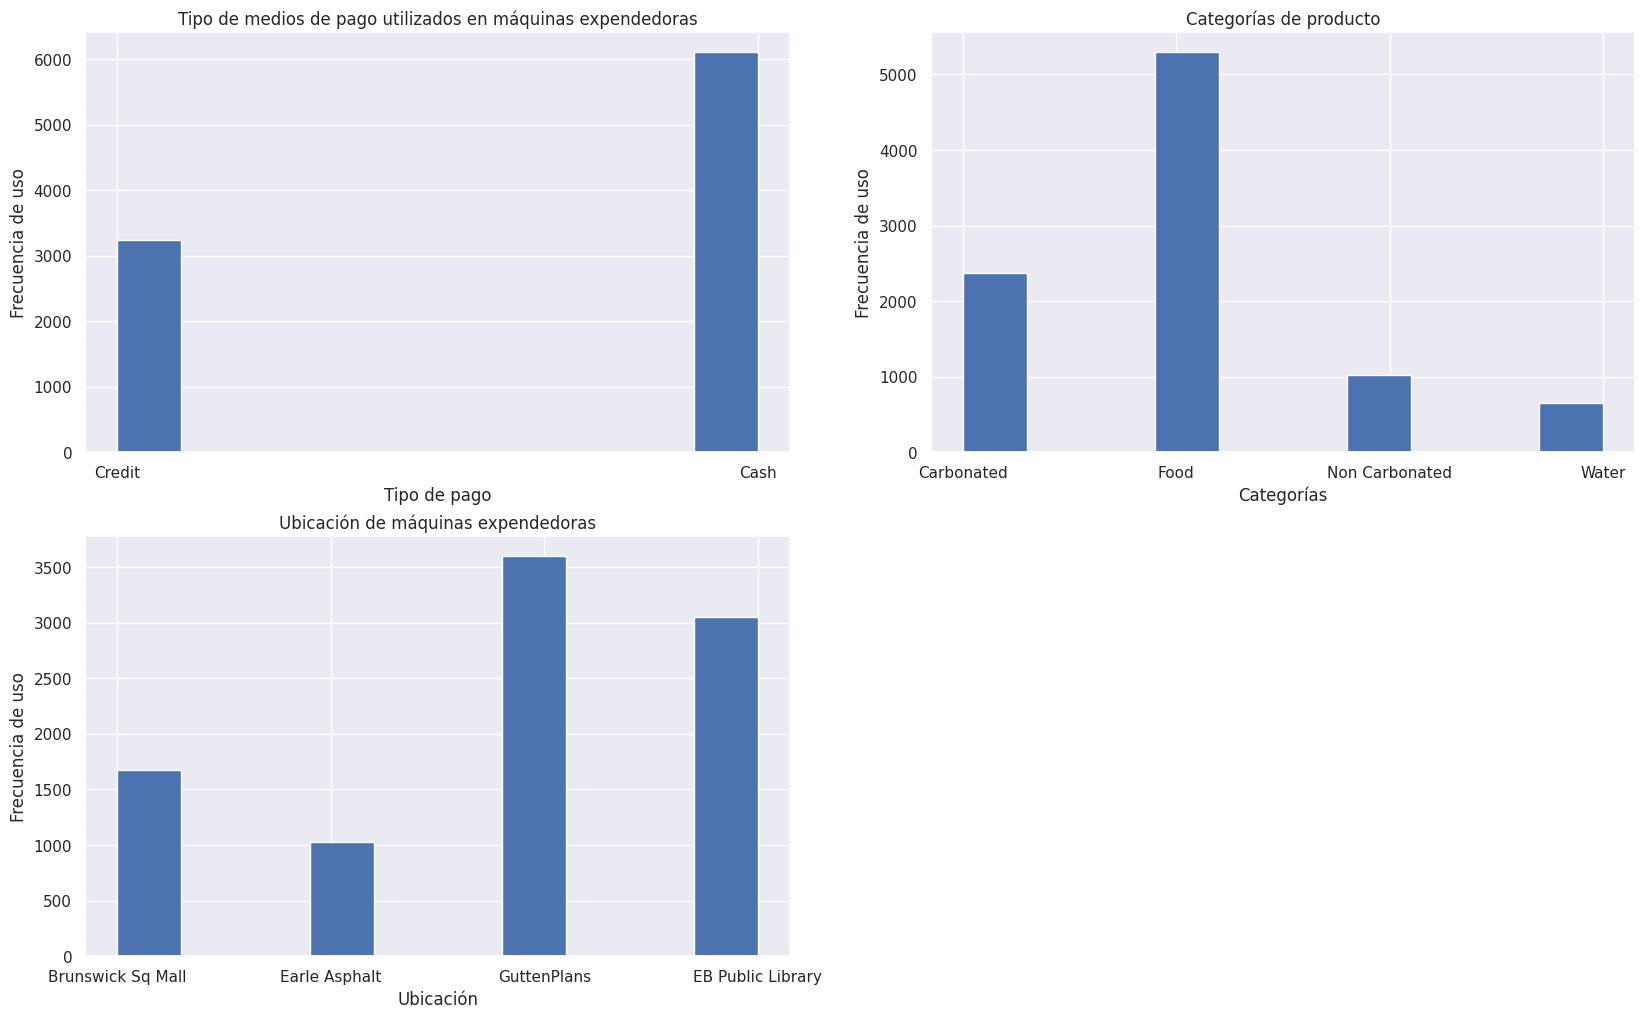

In [33]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.hist(data['Type'])
plt.title("Tipo de medios de pago utilizados en máquinas expendedoras")
plt.xlabel("Tipo de pago")
plt.ylabel("Frecuencia de uso")


plt.subplot(2,2,2)
plt.hist(data['Category'])
plt.title("Categorías de producto")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia de uso")

plt.subplot(2,2,3)
plt.hist(data['Location'])
plt.title("Ubicación de máquinas expendedoras")
plt.xlabel("Ubicación")
plt.ylabel("Frecuencia de uso")

plt.show

# Ya entrando en materia estadística, antes que todo, como nuestros principal objetivo que es la categoría y tipo se encuentran en una variable cualitativa, ocuparemos LabelEncoder para poder llevarlas a enteros y realizar análisis sobre las transacciones.

In [12]:

from sklearn.preprocessing import LabelEncoder

# Codificar Category
category_encoder = LabelEncoder()
data['Category_encoded'] = category_encoder.fit_transform(data['Category'])

# Codificar Type
type_encoder = LabelEncoder()
data['Type_encoded'] = type_encoder.fit_transform(data['Type'])

# Mostrar mapeos
print("\nMapeo de categorías originales a valores codificados (Category):")
for category, code in zip(category_encoder.classes_, category_encoder.transform(category_encoder.classes_)):
    print(f"{category} -> {code}")

print("\nMapeo de tipos originales a valores codificados (Type):")
for type_value, code in zip(type_encoder.classes_, type_encoder.transform(type_encoder.classes_)):
    print(f"{type_value} -> {code}")
data.head()


Mapeo de categorías originales a valores codificados (Category):
Carbonated -> 0
Food -> 1
Non Carbonated -> 2
Water -> 3

Mapeo de tipos originales a valores codificados (Type):
Cash -> 0
Credit -> 1


,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,Category_encoded,Type_encoded
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,0,1
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022,0,1
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022,1,1
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022,1,1
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,0,1


# Lo primero que validaremos es una matriz de correlación entre el medio de pago y tipo de comida, siendo este como resultado muy bajo 0,11, es decir no podemos explicar en principio que tengan algún nivel de relación entre las variables, esto es por que la matriz de correlación funciona mejor para variables cuantitativas.

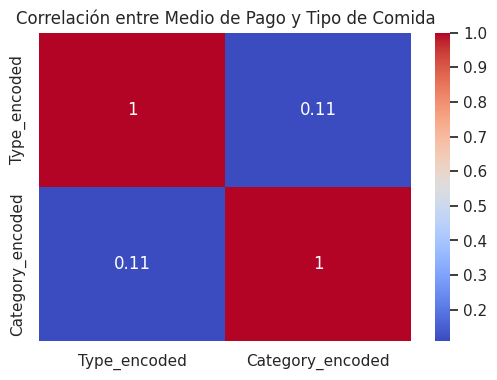

In [13]:
from scipy.stats import chi2_contingency
correlation_matrix = data[['Type_encoded', 'Category_encoded']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)


plt.title('Correlación entre Medio de Pago y Tipo de Comida')
plt.show()

# Para nuestro caso en particular, es el test de chi cuadrado el que aplicaría ya que las categorías observadas son de tipo cualitativa.

In [39]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Type_encoded'], data['Category_encoded'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print("Tabla de contingencia:")
print(contingency_table)
print("\nResultado del test de Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-value: {p}")


if p < 0.05:
    print("\nRechazamos la hipótesis nula: Hay una relación significativa entre el medio de pago y la categoría de producto.")
else:
    print("\nNo podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las ventas en efectivo están predominantemente asociadas con snacks.")

Tabla de contingencia:
Category_encoded     0     1    2    3
Type_encoded                          
0                 1728  3448  559  373
1                  649  1845  464  284

Resultado del test de Chi-cuadrado:
Chi-cuadrado: 129.8479177738352
P-value: 5.832400004959029e-28

Rechazamos la hipótesis nula: Hay una relación significativa entre el medio de pago y la categoría de producto.


In [74]:

data['TransDate'] = pd.to_datetime(data['TransDate'], errors='coerce')

print(data['TransDate'].dtype)

datetime64[ns]


# Si bien es cierto, congruimos que existe una relación significativa entre el medio de pago y la categoría del producto, no podemos afirmar con certeza bajo una regresión lineal simple, que tenemos una ecuación para poder estimar las ventas al contado durante el año ya que existe una disperción significativa.

     TransDate  Type  TransTotal
0   2022-01-02  Cash        2.50
1   2022-01-03  Cash       20.50
2   2022-01-04  Cash       22.25
3   2022-01-05  Cash       10.50
4   2022-01-06  Cash       22.50
..         ...   ...         ...
350 2022-12-27  Cash       36.50
351 2022-12-28  Cash       42.00
352 2022-12-29  Cash       29.50
353 2022-12-30  Cash       38.00
354 2022-12-31  Cash        6.50

[355 rows x 3 columns]
Coeficiente: 0.02623738579271373
Intercepto: 27.323610006799676
R² del modelo: 0.03


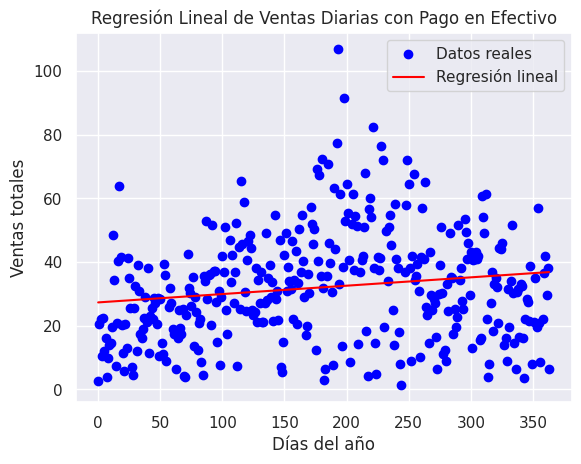

In [81]:
datacash = data[data['Type'] == 'Cash']
ventas_diarias = datacash.groupby(['TransDate', 'Type'])['TransTotal'].sum().reset_index()
print(ventas_diarias)

ventas_diarias['Días'] = (ventas_diarias['TransDate'] - ventas_diarias['TransDate'].min()).dt.days

X = ventas_diarias[['Días']]
y = ventas_diarias['TransTotal']

model = LinearRegression()

model.fit(X, y)

predicciones = model.predict(X)

r2 = model.score(X, y)

print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")
print(f"R² del modelo: {r2:.2f}")

import matplotlib.pyplot as plt

plt.scatter(ventas_diarias['Días'], y, color='blue', label='Datos reales')
plt.plot(ventas_diarias['Días'], predicciones, color='red', label='Regresión lineal')
plt.xlabel('Días del año')
plt.ylabel('Ventas totales')
plt.title('Regresión Lineal de Ventas Diarias con Pago en Efectivo')
plt.legend()
plt.show()